# **Libraries**

In [38]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from math import log2, sqrt
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from scipy.stats import skew
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from tqdm.notebook import tqdm_notebook as tqdm
from scipy.stats import spearmanr
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB


# **Loading data**

In [61]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1 , inplace= True)

In [63]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [65]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [44]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [45]:
df.duplicated().sum()

403

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



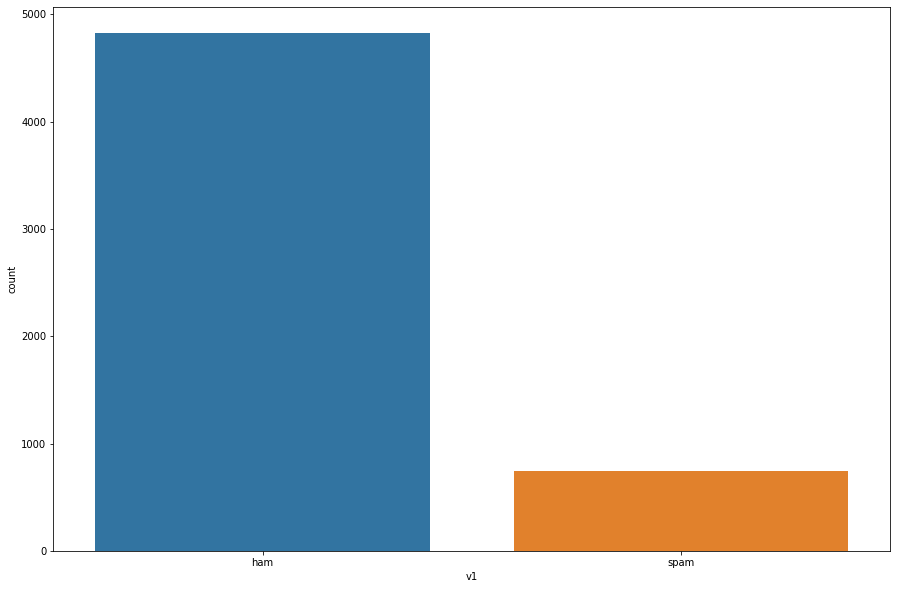

In [6]:
plt.figure(figsize=(15,10))
sns.countplot(df['v1'])

**The data is unbalanced.**

In [66]:
df_copy = df.rename(columns={"v1": "target", "v2": "content"})

# **Data splitting**

In [67]:
training, testing = train_test_split(df_copy, test_size=0.2, random_state=2018)

**Word cloud for frequent words**

In [50]:
spam = ' '.join([elem for elem in training.query('target == "spam"').content.tolist()])
ham = ' '.join([elem for elem in training.query('target == "ham"').content.tolist()])

wordcloud_spam = WordCloud(max_font_size=50).generate(spam)
wordcloud_ham = WordCloud(max_font_size=50).generate(ham)

In [27]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

**Spam wordc loud**

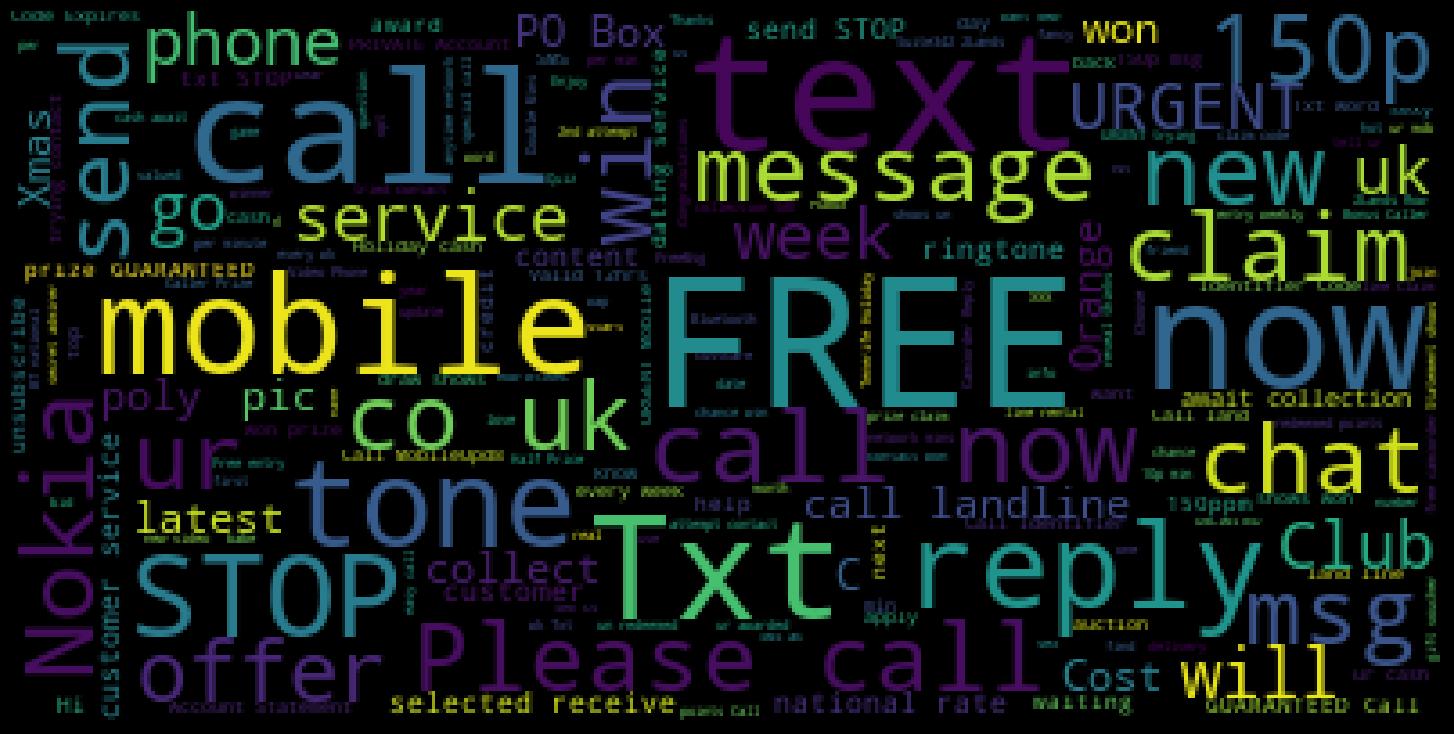

<Figure size 432x288 with 0 Axes>

In [28]:
plot_Cloud(wordcloud_spam)

**Ham wordc loud**

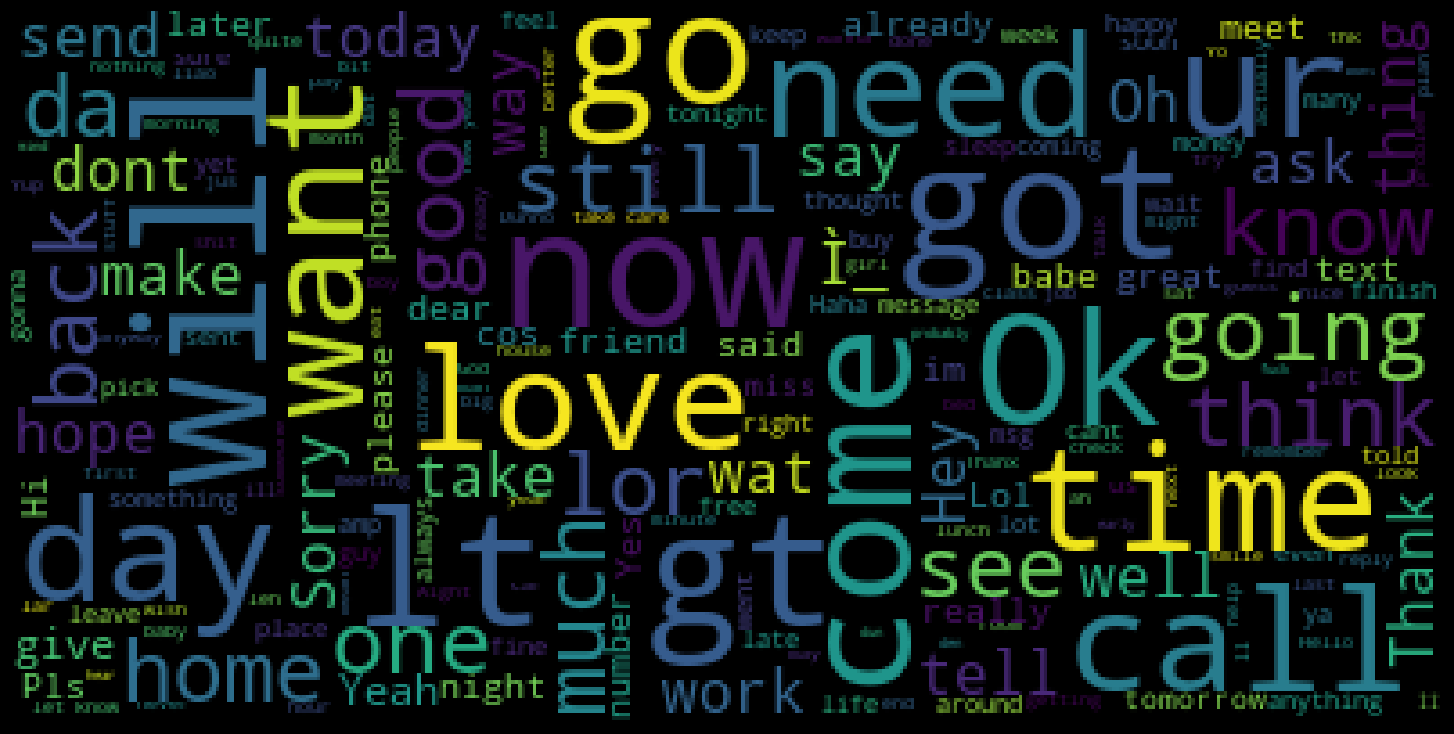

<Figure size 432x288 with 0 Axes>

In [29]:
plot_Cloud(wordcloud_ham)

# **Encoding**

In [69]:
cat_cols = df_copy.columns[(df.dtypes =='object').values].tolist()
cat_cols

['target', 'content']

In [70]:
v2 = df.iloc[:,-1]
v2_encoder = LabelEncoder()
v2 = v2_encoder.fit_transform(v2)
df_copy.iloc[:,-1]=v2

In [72]:
target = []

for j in range(len(df_copy)):
    if df_copy['target'].iloc[j] == "spam":
        result = 0
    else:
        result = 1
    target.append(result)

df_copy['target'] = target

In [73]:
df_copy

,target,content
0,1,1079
1,1,3101
2,0,1000
3,1,4088
4,1,2757
...,...,...
5567,0,3992
5568,1,4560
5569,1,3286
5570,1,3901


In [74]:
training, testing = train_test_split(df_copy, test_size=0.2, random_state=2018)

In [78]:
X_train, y_train = pd.DataFrame(training['content']), pd.DataFrame(training['target'])
X_test, y_test = pd.DataFrame(testing['content']), pd.DataFrame(testing['target'])

In [11]:
vec = CountVectorizer(lowercase= True, encoding= 'utf-8', max_features=1000, stop_words='english')

X_counts = vec.fit_transform(X_train)
count = pd.DataFrame(
    X_counts.toarray(), columns=vec.get_feature_names(), index=X_train
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [41]:
word_freq = count.T
word_freq['length'] = word_freq.sum(axis=1)
word_freq = pd.DataFrame(word_freq.loc[:, 'length']).reset_index()
word_freq = word_freq.sort_values(['length'], ascending=False)

import altair as alt
alt.Chart(word_freq.iloc[0:20,:]).mark_bar().encode(
y=alt.Y('index', sort='x'),
x='length')

alt.Chart(...)

In [79]:
X_train

,content
1901,3666
5528,2316
3581,4800
3960,4904
403,2900
...,...
2196,2929
917,4487
2825,3113
2662,1351


In [80]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [81]:
print(metrics.accuracy_score(y_pred,y_test))

0.8645739910313901
